In [54]:
import pandas as pd
import matplotlib.pyplot as plt

import kagglehub

# Download latest version

df = pd.read_csv("World-Stock-Prices-Dataset.csv")

# Drop rows where 'Date' couldn't be parsed
df = df.dropna(subset=['Date'])

tickers = ['AAPL','AMZN','MSFT','NVDA']
df = df[df['Ticker'].isin(tickers)]

df = df[['Date','Open','Close','Brand_Name','Ticker']]

print(df.dtypes)
df

Date           object
Open          float64
Close         float64
Brand_Name     object
Ticker         object
dtype: object


,Date,Open,Close,Brand_Name,Ticker
3,2025-07-03 00:00:00-04:00,221.705002,223.410004,amazon,AMZN
4,2025-07-03 00:00:00-04:00,212.145004,213.550003,apple,AAPL
18,2025-07-03 00:00:00-04:00,158.350006,159.339996,nvidia,NVDA
54,2025-07-03 00:00:00-04:00,493.494995,498.839996,microsoft,MSFT
86,2025-07-03 00:00:00-04:00,212.149994,213.550003,apple,AAPL
...,...,...,...,...,...
310086,2000-01-04 00:00:00-05:00,35.273749,34.982552,microsoft,MSFT
310095,2000-01-03 00:00:00-05:00,36.457976,36.205605,microsoft,MSFT
310097,2000-01-03 00:00:00-05:00,0.794800,0.848323,apple,AAPL
310101,2000-01-03 00:00:00-05:00,0.903091,0.894729,nvidia,NVDA


In [55]:
df['Date'] = df['Date'].astype(str)


In [56]:
print(df.dtypes)

Date           object
Open          float64
Close         float64
Brand_Name     object
Ticker         object
dtype: object


In [57]:
import pandas as pd
from dateutil import parser

# Safely parse each value with timezone handling
df['Date'] = df['Date'].apply(lambda x: parser.parse(x).date() if pd.notnull(x) else None)

# Convert to string format 'YYYY-MM-DD'
df['Date'] = df['Date'].astype(str)

In [58]:
print(df.dtypes)

Date           object
Open          float64
Close         float64
Brand_Name     object
Ticker         object
dtype: object


In [59]:
df

,Date,Open,Close,Brand_Name,Ticker
3,2025-07-03,221.705002,223.410004,amazon,AMZN
4,2025-07-03,212.145004,213.550003,apple,AAPL
18,2025-07-03,158.350006,159.339996,nvidia,NVDA
54,2025-07-03,493.494995,498.839996,microsoft,MSFT
86,2025-07-03,212.149994,213.550003,apple,AAPL
...,...,...,...,...,...
310086,2000-01-04,35.273749,34.982552,microsoft,MSFT
310095,2000-01-03,36.457976,36.205605,microsoft,MSFT
310097,2000-01-03,0.794800,0.848323,apple,AAPL
310101,2000-01-03,0.903091,0.894729,nvidia,NVDA


/var/folders/ds/knsrbhs978nbv47j6163y9mw0000gn/T/ipykernel_2834/622812990.py:10: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.relplot(
/var/folders/ds/knsrbhs978nbv47j6163y9mw0000gn/T/ipykernel_2834/622812990.py:10: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.relplot(


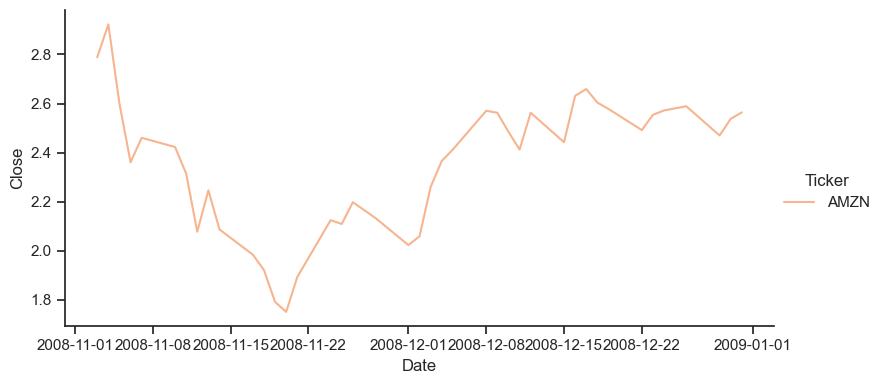

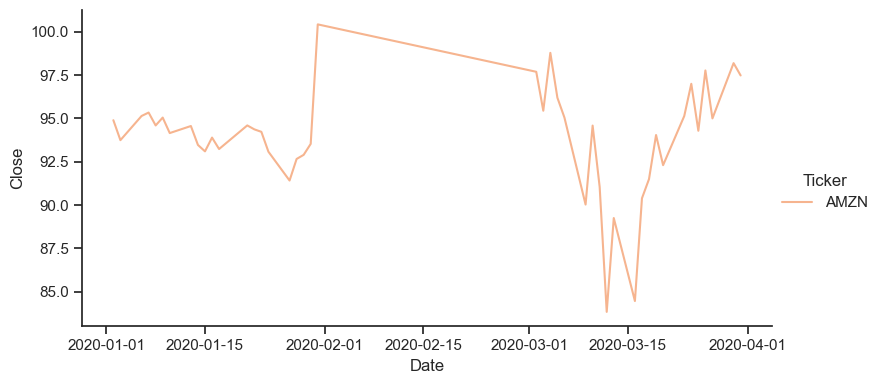

In [66]:
import seaborn as sns
sns.set_theme(style="ticks")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure datetime format

# Filter rows where the year is 2025
palette = sns.color_palette("rocket_r")

def createPlot(selectedTicker,selectedYear,providedMonths):
# Plot the lines on two facets
    sns.relplot(
        data=df[(df['Ticker'] == selectedTicker) & (df['Date'].dt.year == selectedYear) & (df['Date'].dt.month.isin(providedMonths))],
        x="Date", y="Close",
        hue="Ticker", 
        kind="line", size_order=["T1", "T2"], palette=palette,
        height=4, aspect=2, facet_kws=dict(sharex=False),
    )
years = [2008,2020,2025]
createPlot('AMZN',2008,[11,12])
createPlot('AMZN',2020,[1,3])
createPlot('AMZN',2025,[11,12])

#for e in years:
#    createPlot('AMZN',e,[11,12])
#createPlot('AMZN',2025)
#createPlot('AMZN',2013)

2025-01-02 00:00:00 2025-07-03 00:00:00
Date          datetime64[ns]
Open                 float64
Close                float64
Brand_Name            object
Ticker                object
dtype: object


<Figure size 1000x800 with 0 Axes>

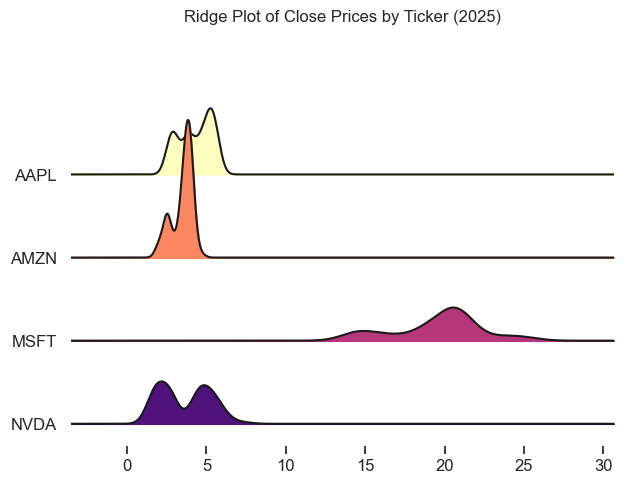

In [39]:
import joypy
import matplotlib.pyplot as plt

df_2025 = df[df['Date'].dt.year == 2008]

# Assuming you want to plot the distribution of 'Close' by 'Ticker' as ridges
plt.figure(figsize=(10, 8))
joypy.joyplot(
    data=df_2025,
    by='Ticker',
    column='Close',
    kind='kde',
    fill=True,
    overlap=1,
    colormap=plt.cm.magma_r
)
plt.title("Ridge Plot of Close Prices by Ticker (2025)")
plt.show()

In [51]:
pip install yfinance

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 6.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=44ea6425d9a51e5d5462e67b30270db3fa16a8adbbfcbd80f071493f46f4d80e
  Stored in directory: /Users/faiyeznoor/Library/Caches/pip/wheels/1e/df/0f/e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
  Created wheel for peewee: filename=peewee-3.18.2-cp313-cp313-macosx_10_13_universal2.whl size=432880 sha256=7805c5e722a12cd2b63c72cfe9d9e835c9cef2365b07eebb5e000b5b7c1b1e51
  Stored in directory: /Users/faiyeznoor/Library/Caches/pip/wheels/1c/48/cc/00b7d0e7defa21a

In [53]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers and years
tickers = ['AAPL', 'MSFT', 'NVDA']
years = list(range(2005, 2025))

# Download adjusted close prices
data = yf.download(tickers, start="2005-01-01", end="2025-01-01")['Adj Close']

# Prepare dictionary to hold drawdowns
drawdowns = {ticker: [] for ticker in tickers}

# Calculate max drawdown for each stock each year
for year in years:
    for ticker in tickers:
        # Get yearly data
        yearly_data = data[ticker][f"{year}-01-01":f"{year}-12-31"]
        if not yearly_data.empty:
            # Calculate cumulative peak and drawdown
            peak = yearly_data.cummax()
            dd = ((yearly_data - peak) / peak).min()  # Max drawdown (as negative %)
            drawdowns[ticker].append(dd)
        else:
            drawdowns[ticker].append(None)

# Convert to DataFrame for display
dd_df = pd.DataFrame(drawdowns, index=years)
dd_df = (dd_df * 100).round(2)  # Convert to % and round

# Print the table
print("📉 Yearly Maximum Drawdowns (%):")
print(dd_df)

# Optional: Plotting
dd_df.plot(figsize=(14,6), marker='o', title="Annual Max Drawdowns (2005–2024)")
plt.ylabel("Max Drawdown (%)")
plt.grid(True)
plt.show()


/var/folders/ds/knsrbhs978nbv47j6163y9mw0000gn/T/ipykernel_2834/2547972783.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2005-01-01", end="2025-01-01")['Adj Close']
[*********************100%***********************]  3 of 3 completed


KeyError: 'Adj Close'